# Report 4 - Algorithms with backtracking
### Jakub Jagła, Łukasz Borak - Laboratories group 3, Algorithms and Data Structures
*** 

## Descriptions

1. **Eulerian cycle** - it's an Eulerian path, that starts and ends in the same vertex. Eulerian path, however, visits every edge exactly once. It doesn't matter if we visit some vertices more than once. We are only focused on edges. For a graph to have an Eulerian cycle, all its vertices need to be of even degree. 

2. **Hamiltonian cycle** - similiarly to Eulerian cycle, it's a Hamiltonian path, that starts and ends in the same vertex. However this time we are concerned with vertices. Hamiltonian path is path that visits each vertex exactly once. A graph that contains a Hamiltonian cycle is called a Hamiltonian graph. Determining whether a graph is Hamiltonian, is a well known **NP-complete problem**. 

### Time Complexity

$V$ - number of vertices | $E$ - number of edges
 - Eulerian cycle: $O(V + E)$
 - Hamiltonian cycle: $O(V!)$ (worst case, when there is no Hamiltonian cycle, but algorithm has to go through all possible solutions)

## Code

### Finding Eulerian cycle

In [52]:
'''
Input format:
5 3     Number of vertices | Number of edges
4 3     Edge 1
2 3     Edge 2
4 2     Edge 3
'''

def Euler(num_vert, num_edges, edges):
    adj_list = [[] for _ in range(num_vert + 1)]

    for edge in edges:
        adj_list[edge[0]].append(edge[1])
        adj_list[edge[1]].append(edge[0])

    # check even degrees
    for vertex in range(1, num_vert + 1):
        if len(adj_list[vertex]) % 2 != 0:
            print('No Eulerian cycle')
            return 'No Eulerian cycle'

    # DFS
    cycle = []
    stack = [edges[0][0]]
    while stack:
        curr_vert = stack[-1]
        if adj_list[curr_vert]:
            next_vert = adj_list[curr_vert].pop()
            stack.append(next_vert)
            adj_list[next_vert].remove(curr_vert)
        else:
            cycle.append(stack.pop())

    # check if all edges visited, return the cycle
    return 'No Eulerian cycle' if len(cycle) != num_edges + 1 else cycle

Testing

In [53]:
f = open('euler.txt')
num_vert, num_edges = f.readline().split(' ')
num_vert, num_edges = int(num_vert), int(num_edges)

edges = []

for _ in range(num_edges):
    a, b = f.readline().split(' ')
    edges.append([int(a), int(b)])

print(Euler(num_vert, num_edges, edges))

[597, 973, 450, 695, 114, 532, 550, 562, 740, 728, 440, 591, 865, 166, 437, 394, 307, 891, 383, 290, 997, 304, 588, 31, 928, 548, 579, 29, 852, 681, 736, 849, 666, 985, 735, 506, 553, 803, 719, 339, 335, 735, 87, 960, 418, 671, 969, 339, 777, 392, 616, 1000, 745, 169, 795, 459, 624, 599, 768, 173, 947, 675, 904, 658, 280, 808, 394, 658, 10, 235, 401, 614, 959, 438, 836, 420, 948, 986, 422, 672, 896, 466, 640, 790, 962, 454, 228, 613, 97, 678, 305, 409, 962, 450, 800, 349, 16, 619, 11, 536, 110, 626, 842, 917, 804, 609, 794, 790, 577, 4, 816, 499, 4, 742, 322, 476, 194, 590, 991, 143, 99, 841, 833, 894, 324, 825, 130, 480, 487, 489, 399, 102, 966, 732, 562, 832, 520, 416, 143, 201, 327, 718, 688, 336, 564, 163, 777, 101, 95, 837, 28, 447, 248, 141, 59, 992, 436, 959, 856, 186, 607, 826, 872, 781, 983, 283, 370, 251, 793, 29, 878, 532, 479, 798, 545, 942, 206, 285, 38, 351, 54, 882, 862, 675, 58, 738, 661, 632, 459, 927, 176, 622, 797, 280, 38, 999, 706, 414, 189, 17, 295, 552, 316, 23, 

### Finding Hamiltonian cycle

In [54]:
def Hamilton(num_verts, edges):
    # adjacency list
    adj_list = [[] for _ in range(num_verts + 1)]

    for edge in edges:
        adj_list[edge[0]].append(edge[1])
        adj_list[edge[1]].append(edge[0])

    # check degree
    for i in range(1, num_verts + 1):
        if len(adj_list[i]) < 2:
            print('No Hamiltonian cycle')
            return 'No Hamiltonian cycle'

    # main program
    stack = [edges[0][0]]
    visited = {edges[0][0]}
    last_visited = None
    next_neighbor = {v: 0 for v in range(1, num_verts + 1)}
    
    while stack:
        current_vertex = stack[-1]

        if next_neighbor[current_vertex] >= len(adj_list[current_vertex]):
            last_visited = stack.pop()
            visited.remove(last_visited)
            next_neighbor[last_visited] = 0
            continue

        neighbor = adj_list[current_vertex][next_neighbor[current_vertex]]
        next_neighbor[current_vertex] += 1

        if neighbor in visited:
            continue

        stack.append(neighbor)
        visited.add(neighbor)

        if len(stack) == num_verts and edges[0][0] in adj_list[neighbor - 1]:
            return stack

Testing

In [55]:
f = open('hamilton.txt')
num_vert, num_edges = f.readline().split(' ')
num_vert, num_edges = int(num_vert), int(num_edges)

edges = []

for _ in range(num_edges):
    a, b = f.readline().split(' ')
    edges.append([int(a), int(b)])

print(Hamilton(num_vert, edges))

[1, 5, 3, 6, 10, 7, 9, 8, 2, 4]


### Timer

In [50]:
'''
Measure how much time it takes for each program to find a valid cycle. Test two cases – when
the cycle exists and random graphs. Check graphs with at least twice as many edges as vertices.
Plot the results
'''
from timeit import timeit
import subprocess
import time as t

def run_function(function, graph):
    timings = []
    sizes = range(10, 45, 5) if function == 'Hamilton' else range(10, 200, 10)

    for i in sizes:
        if graph == 'euler':
            out = subprocess.run([f'./{graph}.exe', f'{i}'], capture_output=True, text=True)
        else:
            out = subprocess.run([f'./{graph}.exe', f'{i}', f'{i*2}'], capture_output=True, text=True)
        
        t.sleep(0.1)

        output_lines = out.stdout.splitlines()
        num_vert, num_edges = map(int, output_lines[0].split(' '))

        edges = []

        for line in output_lines[1:]:
            a, b = map(int, line.split(' '))
            edges.append([a, b])

        #print(num_vert, num_edges)
        #for edge in edges:
        #    print(edge[0], edge[1])

        if function == 'Euler':
            time = timeit(lambda: Euler(num_vert, num_edges, edges), number=1)
        else: 
            time = timeit(lambda: Hamilton(num_vert, edges), number=1)
        print(i, time)
        timings.append(time)

    return sizes, timings


# Cycle exists
print('Cycle exists\tEuler')
euler_sizes, euler_timings = run_function('Euler', 'euler')

print('Cycle exists\tHamilton')
hamilton_sizes, hamilton_timings = run_function('Hamilton', 'hamilton')

# Random graphs
print('Random graphs\tEuler')
random_euler_sizes, random_euler_timings = run_function('Euler', 'random')

print('Random graphs\tHamilton')
random_hamilton_sizes, random_hamilton_timings = run_function('Hamilton', 'random')

Cycle exists	Euler
10 1.5199999324977398e-05
20 2.3500004317611456e-05
30 0.00018740000086836517
40 6.430002395063639e-05
50 0.00011669998639263213
60 0.00013189998571760952
70 0.000732100015738979
80 0.0004960999940522015
90 0.0005435000057332218
100 0.0005515000084415078
110 0.0006450999935623258
120 0.0005530999915208668
130 0.000749400001950562
140 0.0009590999979991466
150 0.0006178000185173005
160 0.0011052999761886895
170 0.0009185000089928508
180 0.0019918000034522265
190 0.0019724000012502074
Cycle exists	Hamilton
10 4.6900007873773575e-05
15 0.0014186000043991953
20 0.019190499995602295
25 0.0005201000021770597
30 0.01092239998979494
35 0.11486910001258366
40 0.2763097000133712
Random graphs	Euler
No Eulerian cycle
10 5.859998054802418e-05
No Eulerian cycle
20 0.00011029999586753547
No Eulerian cycle
30 3.840000135824084e-05
No Eulerian cycle
40 0.000139000010676682
No Eulerian cycle
50 2.720000338740647e-05
No Eulerian cycle
60 0.0002722999779507518
No Eulerian cycle
70 3.20

## Graphs

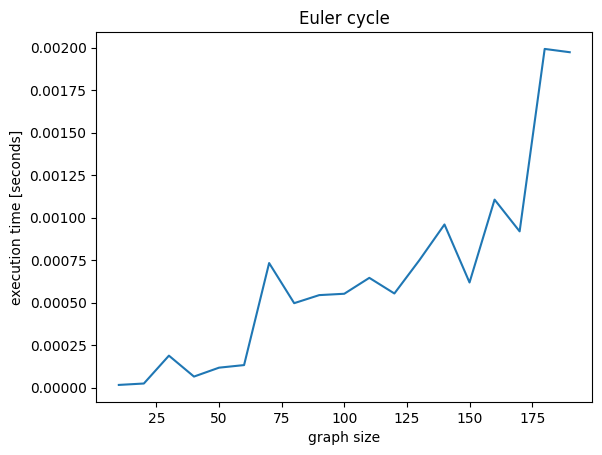

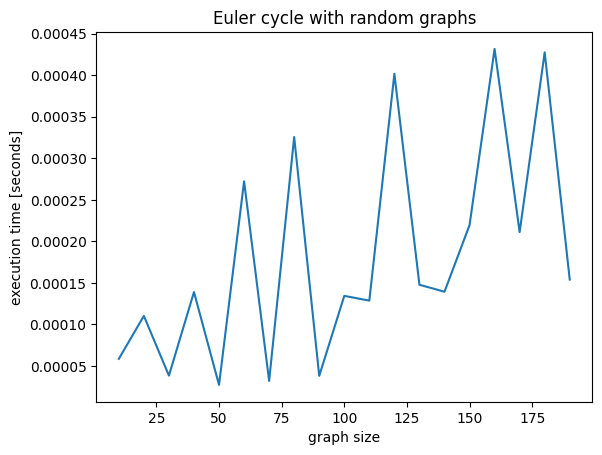

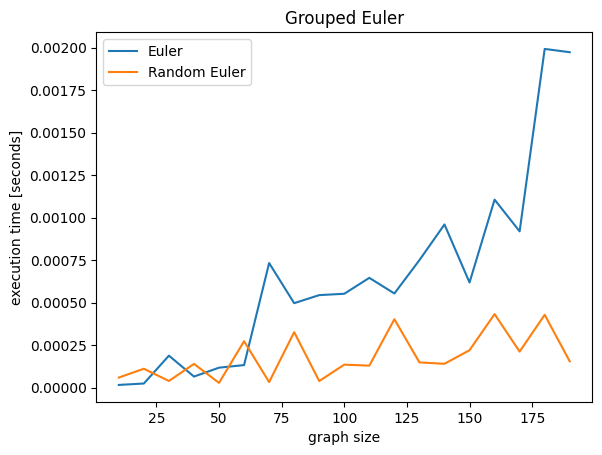

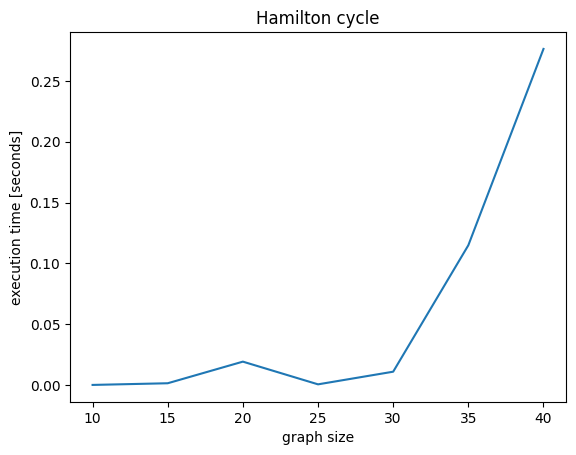

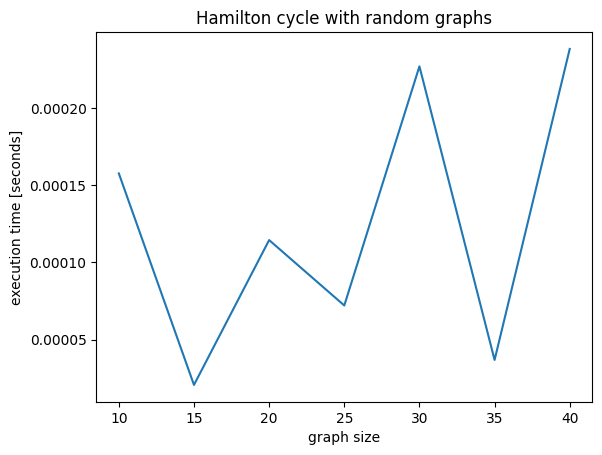

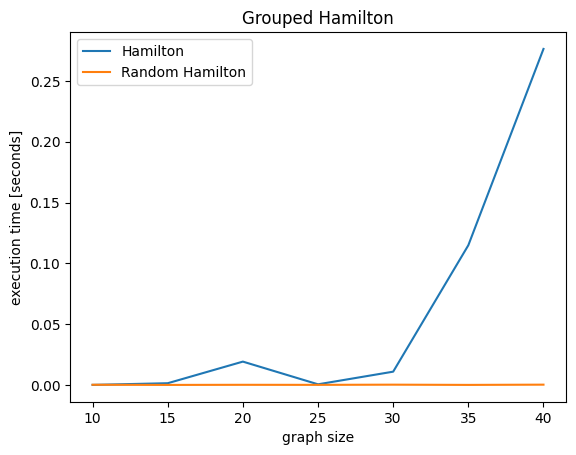

In [51]:
'''
Measure how much time it takes for each program to find a valid cycle. Test two cases – when
the cycle exists and random graphs. Check graphs with at least twice as many edges as vertices.
Plot the results
'''
import matplotlib.pyplot as plt

def display_plot(size, time, title):
    plt.plot(size, time)
    plt.title(title)
    plt.xlabel('graph size')
    plt.ylabel('execution time [seconds]')
    plt.show()

# Euler
display_plot(euler_sizes, euler_timings, 'Euler cycle')
display_plot(random_euler_sizes, random_euler_timings, 'Euler cycle with random graphs')

plt.plot(euler_sizes, euler_timings, label='Euler')
plt.plot(random_euler_sizes, random_euler_timings, label='Random Euler')
plt.title('Grouped Euler')
plt.xlabel('graph size')
plt.ylabel('execution time [seconds]')
plt.legend()
plt.show()

# Hamilton
display_plot(hamilton_sizes, hamilton_timings, 'Hamilton cycle')
display_plot(random_hamilton_sizes, random_hamilton_timings, 'Hamilton cycle with random graphs')

plt.plot(hamilton_sizes, hamilton_timings, label='Hamilton')
plt.plot(random_hamilton_sizes, random_hamilton_timings, label='Random Hamilton')
plt.title('Grouped Hamilton')
plt.xlabel('graph size')
plt.ylabel('execution time [seconds]')
plt.legend()
plt.show()